In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

594

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nikolskoye
Processing Record 2 of Set 1 | khandbari
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | yulara
Processing Record 5 of Set 1 | svetlogorsk
Processing Record 6 of Set 1 | isoka
Processing Record 7 of Set 1 | amderma
City not found. Skipping...
Processing Record 8 of Set 1 | artyk
City not found. Skipping...
Processing Record 9 of Set 1 | castro
Processing Record 10 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | flinders
Processing Record 13 of Set 1 | manhuacu
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | khvoynaya
Processing Record 16 of Set 1 | antofagasta
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | sabaudia
Processing Record 19 of Set 1 | havre-saint-pierre
Processing Record 20 of Set 1 | dalbandin
Processing Record 21 of Set 

Processing Record 35 of Set 4 | nicoya
Processing Record 36 of Set 4 | tuatapere
Processing Record 37 of Set 4 | rawson
Processing Record 38 of Set 4 | tokmak
Processing Record 39 of Set 4 | louisbourg
City not found. Skipping...
Processing Record 40 of Set 4 | mahanoro
Processing Record 41 of Set 4 | ankara
Processing Record 42 of Set 4 | geraldton
Processing Record 43 of Set 4 | taltal
Processing Record 44 of Set 4 | safranbolu
Processing Record 45 of Set 4 | beshpagir
Processing Record 46 of Set 4 | najran
Processing Record 47 of Set 4 | lagdo
Processing Record 48 of Set 4 | tommot
Processing Record 49 of Set 4 | ambunti
Processing Record 50 of Set 4 | mackay
Processing Record 1 of Set 5 | katsuura
Processing Record 2 of Set 5 | roald
Processing Record 3 of Set 5 | novoanninskiy
Processing Record 4 of Set 5 | cairo
Processing Record 5 of Set 5 | ostrovnoy
Processing Record 6 of Set 5 | kodiak
Processing Record 7 of Set 5 | sturovo
Processing Record 8 of Set 5 | chernyshevskiy
Proces

Processing Record 28 of Set 8 | akdepe
Processing Record 29 of Set 8 | soltsy
Processing Record 30 of Set 8 | puerto madryn
Processing Record 31 of Set 8 | anloga
Processing Record 32 of Set 8 | chabahar
Processing Record 33 of Set 8 | samalaeulu
City not found. Skipping...
Processing Record 34 of Set 8 | calabozo
Processing Record 35 of Set 8 | okha
Processing Record 36 of Set 8 | airai
Processing Record 37 of Set 8 | krasnoselkup
Processing Record 38 of Set 8 | norman wells
Processing Record 39 of Set 8 | iwaki
Processing Record 40 of Set 8 | cap malheureux
Processing Record 41 of Set 8 | canala
Processing Record 42 of Set 8 | arlit
Processing Record 43 of Set 8 | inyonga
Processing Record 44 of Set 8 | chinchani
Processing Record 45 of Set 8 | lompoc
Processing Record 46 of Set 8 | evensk
Processing Record 47 of Set 8 | mecca
Processing Record 48 of Set 8 | chiplun
Processing Record 49 of Set 8 | wahiawa
Processing Record 50 of Set 8 | durgapur
Processing Record 1 of Set 9 | terrace

Processing Record 18 of Set 12 | juuru
Processing Record 19 of Set 12 | meyungs
City not found. Skipping...
Processing Record 20 of Set 12 | kloulklubed
Processing Record 21 of Set 12 | benidorm
Processing Record 22 of Set 12 | teguise
Processing Record 23 of Set 12 | koboldo
City not found. Skipping...
Processing Record 24 of Set 12 | ahipara
Processing Record 25 of Set 12 | coruripe
Processing Record 26 of Set 12 | tomohon
Processing Record 27 of Set 12 | aripuana
Processing Record 28 of Set 12 | nishihara
Processing Record 29 of Set 12 | areia branca
Processing Record 30 of Set 12 | naifaru
Processing Record 31 of Set 12 | placido de castro
Processing Record 32 of Set 12 | skalistyy
City not found. Skipping...
Processing Record 33 of Set 12 | nelson bay
Processing Record 34 of Set 12 | cayenne
Processing Record 35 of Set 12 | monterey
Processing Record 36 of Set 12 | ranong
Processing Record 37 of Set 12 | pafos
Processing Record 38 of Set 12 | kachug
Processing Record 39 of Set 12 

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nikolskoye,59.70,30.79,59.00,87,90,3.51,RU,2020-08-02 21:53:19
1,Khandbari,27.37,87.20,75.16,77,100,0.87,NP,2020-08-02 21:50:15
2,Cape Town,-33.93,18.42,62.01,87,0,12.75,ZA,2020-08-02 21:51:43
3,Yulara,-25.24,130.99,41.00,27,0,5.82,AU,2020-08-02 21:53:19
4,Svetlogorsk,52.63,29.73,54.68,87,58,2.08,BY,2020-08-02 21:53:19
5,Isoka,-10.16,32.63,52.50,74,15,1.23,ZM,2020-08-02 21:53:20
6,Castro,-24.79,-50.01,54.64,71,0,3.76,BR,2020-08-02 21:53:20
7,Puerto Ayora,-0.74,-90.35,75.20,73,75,18.34,EC,2020-08-02 21:53:20
8,Flinders,-34.58,150.86,41.00,86,76,3.00,AU,2020-08-02 21:53:20
9,Manhuacu,-20.26,-42.03,57.90,85,47,3.62,BR,2020-08-02 21:53:20


In [11]:
new_coloum_order =["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness",  "Wind Speed"]
city_data_df = city_data_df[new_coloum_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nikolskoye,RU,2020-08-02 21:53:19,59.70,30.79,59.00,87,90,3.51
1,Khandbari,NP,2020-08-02 21:50:15,27.37,87.20,75.16,77,100,0.87
2,Cape Town,ZA,2020-08-02 21:51:43,-33.93,18.42,62.01,87,0,12.75
3,Yulara,AU,2020-08-02 21:53:19,-25.24,130.99,41.00,27,0,5.82
4,Svetlogorsk,BY,2020-08-02 21:53:19,52.63,29.73,54.68,87,58,2.08


In [12]:
# Create the output file (CSV).
output_data_file = "cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [14]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1596405268.1646743

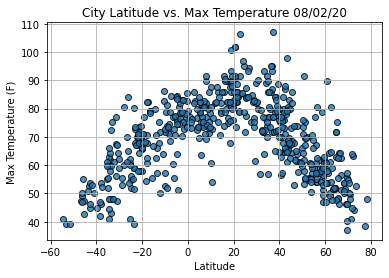

In [15]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Fig1.png")

# Show plot.
plt.show()

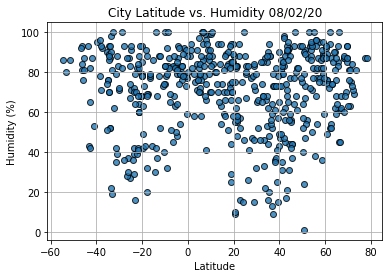

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Fig2.png")

# Show plot.
plt.show()

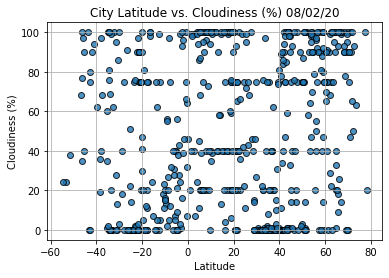

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Fig3.png")

# Show plot.
plt.show()

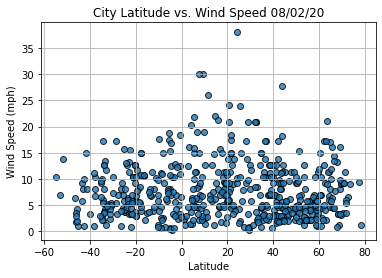

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Fig4.png")

# Show plot.
plt.show()

In [19]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [20]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
index13 = city_data_df.loc[13]
index13

City                      Mataura
Country                        NZ
Date          2020-08-02 21:53:21
Lat                        -46.19
Lng                        168.86
Max Temp                    48.96
Humidity                       93
Cloudiness                     35
Wind Speed                   1.81
Name: 13, dtype: object

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nikolskoye,RU,2020-08-02 21:53:19,59.70,30.79,59.00,87,90,3.51
1,Khandbari,NP,2020-08-02 21:50:15,27.37,87.20,75.16,77,100,0.87
4,Svetlogorsk,BY,2020-08-02 21:53:19,52.63,29.73,54.68,87,58,2.08
10,Albany,US,2020-08-02 21:52:26,42.60,-73.97,87.01,62,47,9.80
11,Khvoynaya,RU,2020-08-02 21:53:21,58.90,34.53,51.37,88,47,2.73
...,...,...,...,...,...,...,...,...,...
541,Pafos,CY,2020-08-02 21:54:26,34.77,32.42,75.20,88,75,4.70
542,Kachug,RU,2020-08-02 21:54:26,53.96,105.88,60.30,86,99,3.89
544,Beringovskiy,RU,2020-08-02 21:54:26,63.05,179.32,47.75,74,100,17.18
545,Asfi,MA,2020-08-02 21:54:21,32.30,-9.24,72.14,74,22,20.96


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

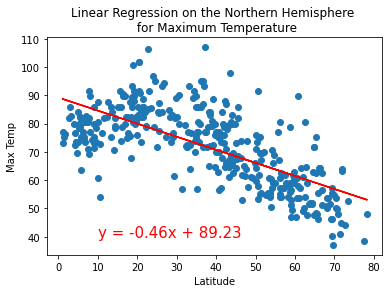

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

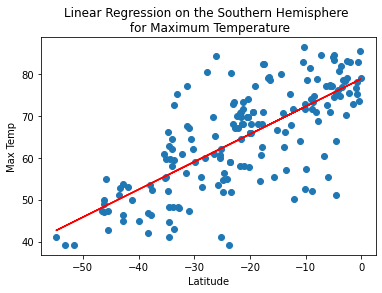

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

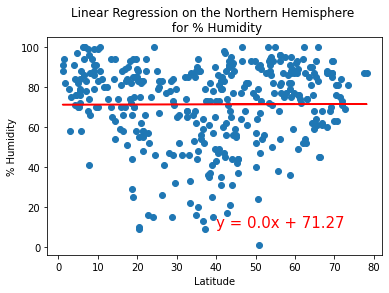

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

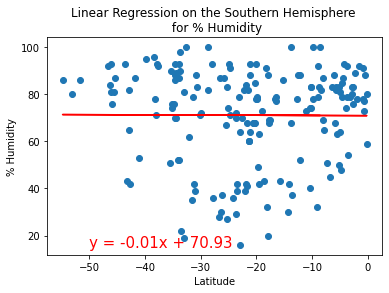

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

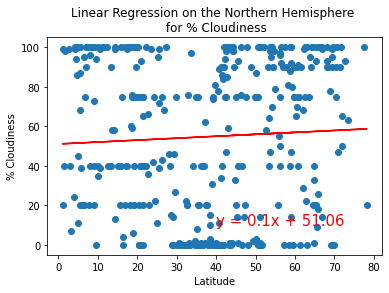

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,10))

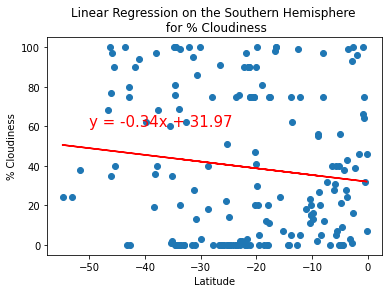

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

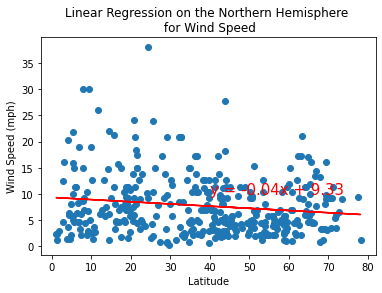

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed (mph)',(40,10))

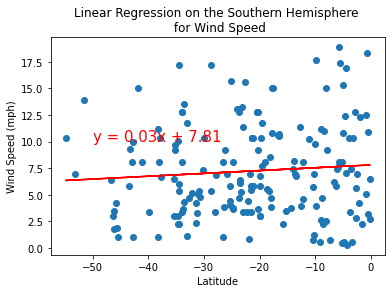

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed (mph)',(-50,10))